In [9]:
import h5py
import numpy as np
import pandas as pd
import gudhi
from datetime import datetime
import sys
import matplotlib.pyplot as plt
import matplotlib

In [10]:
def perseus_gen(image,fname):
    vec = np.ndarray.flatten(image)
    fileheader = "2\n" + str(image.shape[1]) + "\n" + str(image.shape[0])
    np.savetxt(fname=fname, X=vec, delimiter="\n", header=fileheader, comments="", fmt="%.3f")

In [11]:
flist = ["../Mflare_data/M_flare_1h.hdf5","../Mflare_data/M_flare_1h.hdf5","../Bflare_data/B_flare_1h.hdf5"]
time = ['flare_2011.02.13_17:38:00','flare_2011.02.16_14:25:00','flare_2011.02.13_00:42:00']
pd = []

for i in range(3):
    filename = flist[i]
    t = time[i]
    f = h5py.File(filename, "r")
    v = f['HARP377']
    frame = v[t]
    image = np.array(frame['Br'])
    mask = np.array(frame['PIL_MASK'])
    
    check = np.logical_or(np.isnan(image), mask==0)
    image[check] = np.inf
    image = np.abs(image)
    fname = "./" + "Br" + ".txt"
    perseus_gen(image,fname=fname)
    cubical_complex = gudhi.CubicalComplex(perseus_file=fname)
    cubical_complex.compute_persistence()
    cubical_complex.persistence()
    pd.append(cubical_complex)
    f.close()

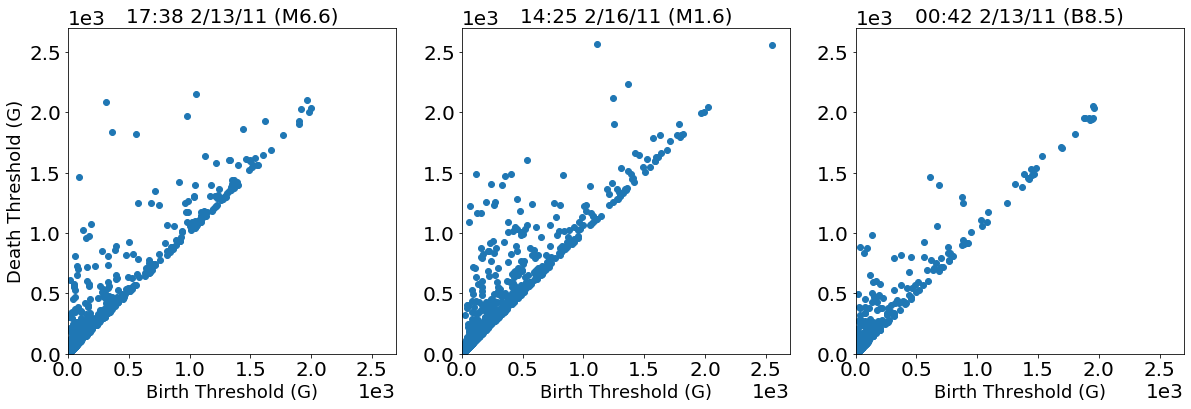

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20,6))
matplotlib.rcParams.update({'font.size': 20})
for i in range(3):
    P = pd[i].persistence()
    birth_death_pair = []
    for tobj in P:
        if tobj[0]==1:
            birth_death_pair.append([tobj[1][0],tobj[1][1]])
    birth_death_pair = np.array(birth_death_pair)
    plt.subplot(1,3,i+1)
    plt.scatter(x=birth_death_pair[:,0], y=birth_death_pair[:,1])
    plt.xlabel("Birth Threshold (G)",fontsize=18)
    if i==0:
        plt.ylabel("Death Threshold (G)",fontsize=18)
    if i==0:
        title = "17:38 2/13/11 (M6.6)"
    if i==1:
        title = "14:25 2/16/11 (M1.6)"
    if i==2:
        title = "00:42 2/13/11 (B8.5)"
    plt.title(title,fontsize=20)
    plt.ylim((0,2700))
    plt.xlim((0,2700))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.xticks([0,500,1000,1500,2000,2500])
    plt.yticks([0,500,1000,1500,2000,2500])

In [24]:
fig.savefig("../paper_writing/persistence_diagram.png",dpi=300)

In [22]:
f.close()